<a href="https://colab.research.google.com/github/LoanNguyen242/MIS780/blob/main/Thi_Phuong_Loan_Nguyen_MIS780A2_Task2(final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MIS780 Advanced AI For Business - Assignment 2 - T2 2024

## Task Number: Business Problem Name

**Student Name:** _enter your full name here_

**Student ID:** _enter your student ID here_

## Table of Content

1. [Executive Summary](#cell_Summary)

2. [Data Preprocessing](#cell_Preprocessing)

3. [Predictive Modeling](#cell_model)

4. [Experiments Report](#cell_report)



<a id = "cell_Summary"></a>
## 1. Executive Summary

*Use this section to introduce the business problem, data set, method, experiments, and obtained results*

<a id = "cell_Preprocessing"></a>
## 2. Data Preprocessing

*Carry out necessary data preprocessing and exploration.*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# to show the folders under the dataset
!ls "/content/drive/MyDrive/DEAKIN/MIS780-Advanced AI in Business/Part2_WasteImages"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Cardboard  Glass  Metal  Paper	Plastic  Vegetation


In [ ]:
%%html
<style>table {float:left}</style>
<style>img {float:left}</style>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow import keras
import tensorflow as tf
import math
import os
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten
from tensorflow.keras.layers import MaxPooling2D, Activation, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard, Callback, EarlyStopping
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Nadam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras import regularizers

from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from traitlets.traitlets import BaseDescriptor

tf.config.list_physical_devices('GPU')

[]

In [ ]:
# Create a function to plot images
def display_images_in_grid(images, figsize=(12, 12), cols=1, interp=False, titles=None):
    if isinstance(images[0], np.ndarray):
        if images.shape[-1] != 3:
            images = images[:, :, :, 0]
    fig = plt.figure(figsize=figsize)
    rows = len(images) // cols + (len(images) % cols > 0)
    for i in range(len(images)):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.axis('Off')  # Turn off axis display for clarity
        if titles is not None:
            ax.set_title(titles[i], fontsize=16)
        plt.imshow(images[i], interpolation='none' if not interp else 'bilinear')

    # Show the final image grid
    plt.show()


In [ ]:
# Create funtion to plot training and validation metrics history
def plot_training_history(history, xsize=8, ysize=6):
    # Set figure size
    plt.rcParams["figure.figsize"] = [xsize, ysize]

   # Get training and validation keys
    metrics = list(history.keys())
    n_metrics = math.floor(len(metrics) / 2)  # Half metrics for training, half for validation
    train_metrics = metrics[:n_metrics]
    validation_metrics = metrics[n_metrics:2 * n_metrics]

    # Summarize history
    for i in range(n_metrics):
        plt.plot(history[train_metrics[i]], label='Train')
        plt.plot(history[validation_metrics[i]], label='Validation')
        plt.title(f'Training vs Validation: {train_metrics[i]}')
        plt.xlabel('Epoch')
        plt.ylabel(train_metrics[i])
        plt.legend(loc='upper left')
        plt.grid(True)  # Optional, makes the plot clearer
        plt.show()

    return

In [ ]:
import os

# Set the paths to the folders containing the image files
cardboard_path = '/content/drive/MyDrive/DEAKIN/MIS780-Advanced AI in Business/Part2_WasteImages/Cardboard'
glass_path = '/content/drive/MyDrive/DEAKIN/MIS780-Advanced AI in Business/Part2_WasteImages/Glass'
metal_path = '/content/drive/MyDrive/DEAKIN/MIS780-Advanced AI in Business/Part2_WasteImages/Metal'
paper_path = '/content/drive/MyDrive/DEAKIN/MIS780-Advanced AI in Business/Part2_WasteImages/Paper'
plastic_path = '/content/drive/MyDrive/DEAKIN/MIS780-Advanced AI in Business/Part2_WasteImages/Plastic'
vegetation_path = '/content/drive/MyDrive/DEAKIN/MIS780-Advanced AI in Business/Part2_WasteImages/Vegetation'

# Get a list of all files in each folder
cardboard_file_list = os.listdir(cardboard_path)
glass_file_list = os.listdir(glass_path)
metal_file_list = os.listdir(metal_path)
paper_file_list = os.listdir(paper_path)
plastic_file_list = os.listdir(plastic_path)
vegetation_file_list = os.listdir(vegetation_path)

# Print the total number of files in each folder
print(f'Total number of files under cardboard folder: {len(cardboard_file_list)}')
print(f'Total number of files under glass folder: {len(glass_file_list)}')
print(f'Total number of files under metal folder: {len(metal_file_list)}')
print(f'Total number of files under paper folder: {len(paper_file_list)}')
print(f'Total number of files under plastic folder: {len(plastic_file_list)}')
print(f'Total number of files under vegetation folder: {len(vegetation_file_list)}')

Total number of files under cardboard folder: 575
Total number of files under glass folder: 420
Total number of files under metal folder: 799
Total number of files under paper folder: 510
Total number of files under plastic folder: 500
Total number of files under vegetation folder: 582


In [ ]:
import tensorflow as tf
import os

# Create a list to store the image data and labels
data = []

# Iterate through the files in the cardboard folder
for file in os.listdir(cardboard_path):
    # Check if the file is a jpeg or jpg file
    if file.endswith('.jpeg') or file.endswith('.jpg'):
        # Load the image data from the file using TensorFlow
        img = tf.io.read_file(os.path.join(cardboard_path, file))
        img = tf.image.decode_jpeg(img)
        img = tf.image.resize(img, (100, 100))
        # Assign a label to the file
        label = 'Cardboard'
        # Add the image data and label to the data list
        data.append((img, label))

# Iterate through the files in the glass folder
for file in os.listdir(glass_path):
    # Check if the file is a jpeg or jpg file
    if file.endswith('.jpeg') or file.endswith('.jpg'):
        # Load the image data from the file using TensorFlow
        img = tf.io.read_file(os.path.join(glass_path, file))
        img = tf.image.decode_jpeg(img)
        img = tf.image.resize(img, (100, 100))
        # Assign a label to the file
        label = 'Glass'
        # Add the image data and label to the data list
        data.append((img, label))

# Iterate through the files in the metal folder
for file in os.listdir(metal_path):
    # Check if the file is a jpeg or jpg file
    if file.endswith('.jpeg') or file.endswith('.jpg'):
        # Load the image data from the file using TensorFlow
        img = tf.io.read_file(os.path.join(metal_path, file))
        img = tf.image.decode_jpeg(img)
        img = tf.image.resize(img, (100, 100))
        # Assign a label to the file
        label = 'Metal'
        # Add the image data and label to the data list
        data.append((img, label))

# Iterate through the files in the paper folder
for file in os.listdir(paper_path):
    # Check if the file is a jpeg or jpg file
    if file.endswith('.jpeg') or file.endswith('.jpg'):
        # Load the image data from the file using TensorFlow
        img = tf.io.read_file(os.path.join(paper_path, file))
        img = tf.image.decode_jpeg(img)
        img = tf.image.resize(img, (100, 100))
        # Assign a label to the file
        label = 'Paper'
        # Add the image data and label to the data list
        data.append((img, label))

# Iterate through the files in the plastic folder
for file in os.listdir(plastic_path):
    # Check if the file is a jpeg or jpg file
    if file.endswith('.jpeg') or file.endswith('.jpg'):
        # Load the image data from the file using TensorFlow
        img = tf.io.read_file(os.path.join(plastic_path, file))
        img = tf.image.decode_jpeg(img)
        img = tf.image.resize(img, (100, 100))
        # Assign a label to the file
        label = 'Plastic'
        # Add the image data and label to the data list
        data.append((img, label))

# Iterate through the files in the vegetation folder
for file in os.listdir(vegetation_path):
    # Check if the file is a jpeg or jpg file
    if file.endswith('.jpeg') or file.endswith('.jpg'):
        # Load the image data from the file using TensorFlow
        img = tf.io.read_file(os.path.join(vegetation_path, file))
        img = tf.image.decode_jpeg(img)
        img = tf.image.resize(img, (100, 100))
        # Assign a label to the file
        label = 'Vegetation'
        # Add the image data and label to the data list
        data.append((img, label))

In [ ]:
# Shuffle the data and split into train/test sets
random.shuffle(data)

# Split the data into 70% for training and 30% for testing
train_data, test_data = data[:int(len(data) * 0.7)], data[int(len(data) * 0.7):]

# Print the size of training and testing sets
print(f'Size of training data: {len(train_data)}')
print(f'Size of testing data: {len(test_data)}')


Size of training data: 2370
Size of testing data: 1016


In [ ]:
# Extract the image data and labels from the training data
X_train, Y_train = zip(*train_data)

# Extract the image data and labels from the testing data
X_test, Y_test = zip(*test_data)

# Convert the image data and labels into NumPy arrays
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

# Display the shape of the datasets
print(f'Shape of training data: {X_train.shape}')
print(f'Shape of training labels: {Y_train.shape}')
print(f'Shape of testing data: {X_test.shape}')
print(f'Shape of testing labels: {Y_test.shape}')

Shape of training data: (2370, 100, 100, 3)
Shape of training labels: (2370,)
Shape of testing data: (1016, 100, 100, 3)
Shape of testing labels: (1016,)


In [ ]:
# Change integers to 32-bit floating point numbers
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize each value for each pixel for the entire vector for each input
X_train /= 255.0
X_test /= 255.0

# Print the shape of the reshaped data
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (2370, 100, 100, 3)
Testing matrix shape (1016, 100, 100, 3)


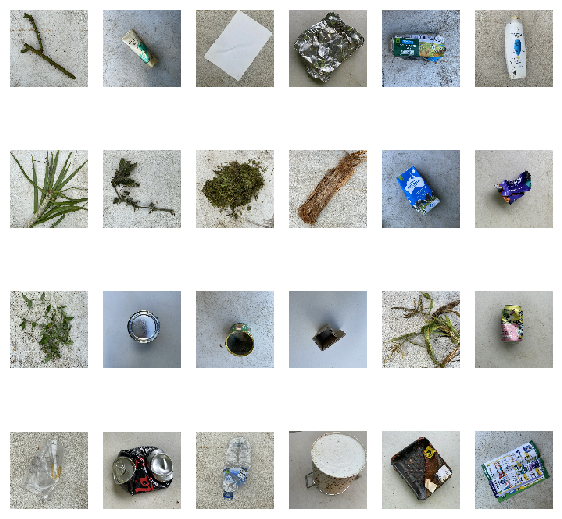

In [ ]:
display_images_in_grid(X_train[0:24], cols=6,figsize=[7,7])

<a id = "cell_model"></a>
## 3. Predictive Modeling

*Create and explain your models (e.g., model architecture, model parameters). Evaluate the models on the experimental data sets.*

In [ ]:
# Data parameters for waste classification
img_rows, img_cols = 100, 100
channels = 3
num_classes = 6
class_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'vegetation']

In [ ]:
train_images = X_train
train_labels = Y_train
test_images = X_test
test_labels = Y_test

CNN 1 with two Convolutional layers, one Flatten layer, one Fully Connected Layer, and one Output layer. Each convolutional layer is followed by MaxPooling and Dropout to reduce overfitting.







In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2

def cnn_model_1():
    model = Sequential()

    # First convolutional layer with L2 regularization
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3), kernel_regularizer=l2(0.001)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))  # Reduce overfitting

    # Second convolutional layer
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Fully connected layer
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    # Output layer with 6 classes corresponding to 6 image categories
    model.add(Dense(6, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model



CNN2 with three Convolutional layers, two Fully Connected layers, and one Output layer. The architecture features larger kernel sizes (5x5) in the first and third convolutional layers, alternating pooling mechanisms (Max and Average), and progressively increasing dropout to mitigate overfitting

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

def cnn_model_2():
    model = Sequential()

    # First convolutional layer with Batch Normalization and L2 regularization
    model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(100, 100, 3), kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())  # Batch normalization to stabilize and speed up training
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))  # Reduce overfitting

    # Second convolutional layer with Batch Normalization
    model.add(Conv2D(64, (5, 5), activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())  # Another Batch normalization
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Fully connected layer
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))  # Increase learning capacity with regularization
    model.add(BatchNormalization())  # Batch normalization in fully connected layers too
    model.add(Dropout(0.5))  # Dropout to reduce overfitting

    # Output layer with 6 classes corresponding to the 6 image categories
    model.add(Dense(6, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Convert string labels to integer labels
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)
Y_test_encoded = label_encoder.transform(Y_test)

# One-hot encode the integer labels
Y_train = to_categorical(Y_train_encoded, num_classes=6)
Y_test = to_categorical(Y_test_encoded, num_classes=6)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
cnn_1 = cnn_model_1()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
history_1= cnn_1.fit(
    X_train, Y_train,
    batch_size=64,
    epochs=100,
    verbose=2,
    validation_data=(X_test, Y_test),
    validation_split=0.2,
    callbacks=[early_stopping]
)

Epoch 1/100
38/38 - 46s - 1s/step - accuracy: 0.1996 - loss: 2.1336 - val_accuracy: 0.1742 - val_loss: 1.7669
Epoch 2/100
38/38 - 85s - 2s/step - accuracy: 0.3536 - loss: 1.5955 - val_accuracy: 0.4439 - val_loss: 1.4313
Epoch 3/100
38/38 - 77s - 2s/step - accuracy: 0.4831 - loss: 1.3744 - val_accuracy: 0.5000 - val_loss: 1.3387
Epoch 4/100
38/38 - 55s - 1s/step - accuracy: 0.5139 - loss: 1.2876 - val_accuracy: 0.5364 - val_loss: 1.2582
Epoch 5/100
38/38 - 44s - 1s/step - accuracy: 0.5527 - loss: 1.1882 - val_accuracy: 0.6083 - val_loss: 1.1310
Epoch 6/100
38/38 - 89s - 2s/step - accuracy: 0.5363 - loss: 1.1568 - val_accuracy: 0.5925 - val_loss: 1.1258
Epoch 7/100
38/38 - 43s - 1s/step - accuracy: 0.5882 - loss: 1.0985 - val_accuracy: 0.6378 - val_loss: 1.0602
Epoch 8/100
38/38 - 87s - 2s/step - accuracy: 0.5844 - loss: 1.0469 - val_accuracy: 0.5945 - val_loss: 1.0952
Epoch 9/100
38/38 - 78s - 2s/step - accuracy: 0.5932 - loss: 1.0488 - val_accuracy: 0.5709 - val_loss: 1.1406
Epoch 10/1

In [ ]:
# Evaluate on training data
train_score = cnn_1.evaluate(X_train, Y_train, verbose=0)
print('Train loss:', round(train_score[0], 4))
print('Train accuracy:', round(train_score[1], 4), '\n')

# Evaluate on test data
test_score = cnn_1.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', round(test_score[0], 4))
print('Test accuracy:', round(test_score[1], 4))

Train loss: 0.4608
Train accuracy: 0.8624 

Test loss: 0.8
Test accuracy: 0.7126


In [ ]:
cnn_2 = cnn_model_2()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
## Train the model
history_2= cnn_2.fit(
    X_train, Y_train,
    batch_size=64,
    epochs=100,
    verbose=2,
    validation_data=(X_test, Y_test),
    validation_split=0.2,
    callbacks=[early_stopping]
)

Epoch 1/100
38/38 - 95s - 3s/step - accuracy: 0.5641 - loss: 1.7806 - val_accuracy: 0.2362 - val_loss: 2.5391
Epoch 2/100
38/38 - 141s - 4s/step - accuracy: 0.6958 - loss: 1.3183 - val_accuracy: 0.1368 - val_loss: 4.3427
Epoch 3/100
38/38 - 142s - 4s/step - accuracy: 0.7464 - loss: 1.1560 - val_accuracy: 0.1368 - val_loss: 6.4632
Epoch 4/100
38/38 - 142s - 4s/step - accuracy: 0.7903 - loss: 1.0401 - val_accuracy: 0.1368 - val_loss: 6.2104
Epoch 5/100
38/38 - 142s - 4s/step - accuracy: 0.8131 - loss: 0.9384 - val_accuracy: 0.1368 - val_loss: 6.7805
Epoch 6/100
38/38 - 94s - 2s/step - accuracy: 0.8557 - loss: 0.8506 - val_accuracy: 0.1368 - val_loss: 7.3751
Epoch 7/100
38/38 - 139s - 4s/step - accuracy: 0.8705 - loss: 0.8036 - val_accuracy: 0.1467 - val_loss: 6.8994
Epoch 8/100


In [ ]:
# Evaluate on training data
train_score = cnn_2.evaluate(X_train, Y_train, verbose=0)
print('Train loss:', round(train_score[0], 4))
print('Train accuracy:', round(train_score[1], 4), '\n')

# Evaluate on test data
test_score = cnn_2.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', round(test_score[0], 4))
print('Test accuracy:', round(test_score[1], 4))

Train loss: 1.9948
Train accuracy: 0.3384 

Test loss: 2.0042
Test accuracy: 0.3159


In [ ]:
from sklearn.metrics import cohen_kappa_score, classification_report

# Make predictions on the test set for CNN1
y_pred_1 = cnn_model_1().predict(X_test)

# Convert the predicted labels to continuous-multioutput format
y_pred_continuous_1 = np.round(y_pred_1)

# Convert the predicted labels to multiclass format
y_pred_multiclass_1 = np.argmax(y_pred_1, axis=1)
y_test_multiclass_1 = np.argmax(Y_test, axis=1)

# Calculate the kappa score for CNN1
kappa_1 = cohen_kappa_score(y_test_multiclass_1, y_pred_multiclass_1)
print("The result of Kappa for CNN1 is:", round(kappa_1, 3))

# Generate the classification report for CNN1
report_1 = classification_report(y_test_multiclass_1, y_pred_multiclass_1, target_names=class_names)

# Print the classification report for CNN1
print("The classification report for CNN1 is: \n", report_1)


32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step
The result of Kappa for CNN1 is: 0.012
The classification report for CNN1 is: 
               precision    recall  f1-score   support

   cardboard       0.18      0.43      0.25       183
       glass       0.00      0.00      0.00       139
       metal       0.28      0.19      0.23       240
       paper       0.07      0.01      0.01       152
     plastic       0.16      0.42      0.23       147
  vegetation       0.00      0.00      0.00       155

    accuracy                           0.19      1016
   macro avg       0.11      0.18      0.12      1016
weighted avg       0.13      0.19      0.13      1016



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Make predictions on the test set for CNN2
y_pred_2 = cnn_model_2().predict(X_test)

# Convert the predicted labels to continuous-multioutput format
y_pred_continuous_2 = np.round(y_pred_2)

# Convert the predicted labels to multiclass format
y_pred_multiclass_2 = np.argmax(y_pred_2, axis=1)
y_test_multiclass_2 = np.argmax(Y_test, axis=1)

# Calculate the kappa score for CNN2
kappa_2 = cohen_kappa_score(y_test_multiclass_2, y_pred_multiclass_2)
print("The result of Kappa for CNN2 is:", round(kappa_2, 3))

# Generate the classification report for CNN2
report_2 = classification_report(y_test_multiclass_2, y_pred_multiclass_2, target_names=class_names)

# Print the classification report for CNN2
print("The classification report for CNN2 is: \n", report_2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 244ms/step
The result of Kappa for CNN2 is: -0.001
The classification report for CNN2 is: 
               precision    recall  f1-score   support

   cardboard       0.22      0.01      0.02       183
       glass       0.00      0.00      0.00       139
       metal       0.00      0.00      0.00       240
       paper       0.00      0.00      0.00       152
     plastic       0.00      0.00      0.00       147
  vegetation       0.15      0.98      0.26       155

    accuracy                           0.15      1016
   macro avg       0.06      0.17      0.05      1016
weighted avg       0.06      0.15      0.04      1016



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step


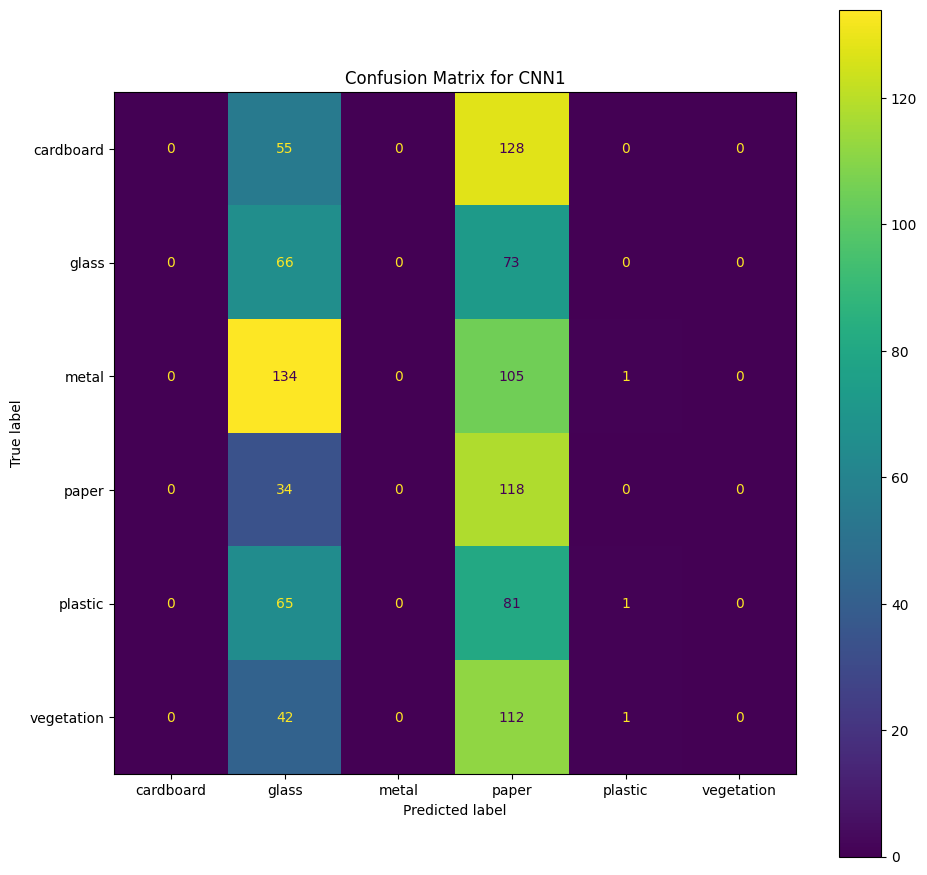

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create the confusion matrix for CNN1
cm_1 = confusion_matrix(y_test_multiclass_1, y_pred_multiclass_1)

# Create a ConfusionMatrixDisplay object for CNN1
display_1 = ConfusionMatrixDisplay(confusion_matrix=cm_1, display_labels=class_names)

# Create a figure with a larger size
fig_1 = plt.figure(figsize=(11, 11))

# Create a subplot within the figure
ax_1 = fig_1.subplots()

# Plot the confusion matrix as a heatmap for CNN1
display_1.plot(ax=ax_1)

# Show the plot for CNN1
plt.title("Confusion Matrix for CNN1")
plt.show()


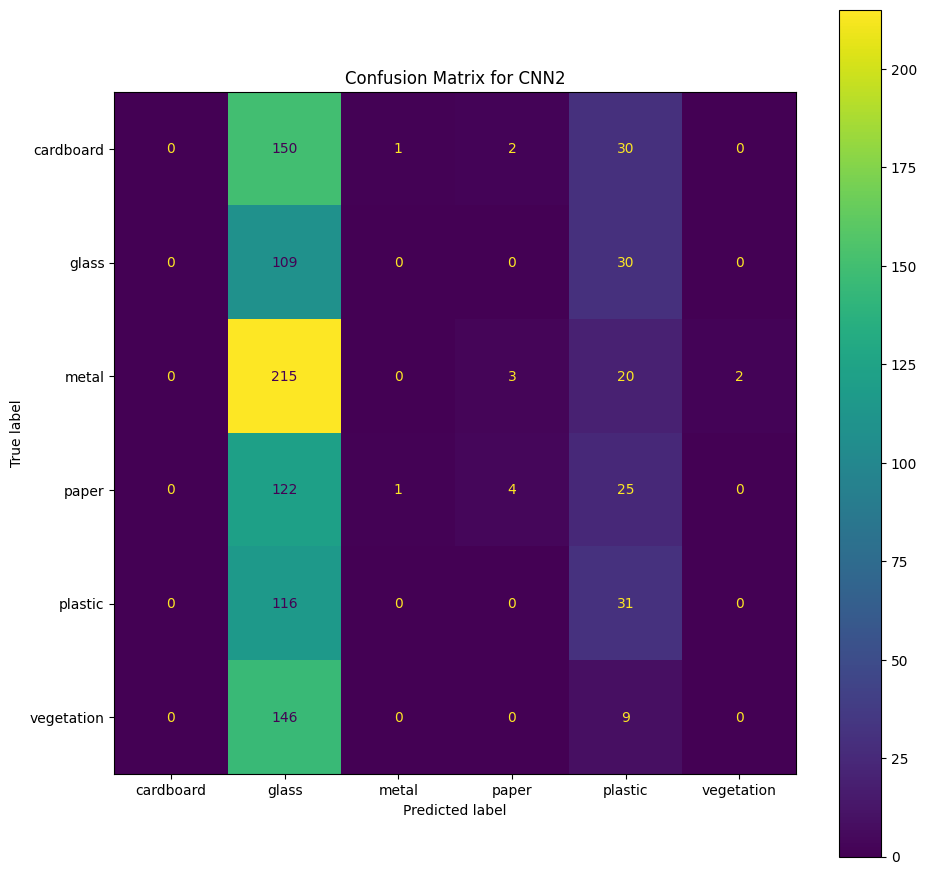

In [ ]:
# Create the confusion matrix for CNN2
cm_2 = confusion_matrix(y_test_multiclass_2, y_pred_multiclass_2)

# Create a ConfusionMatrixDisplay object for CNN2
display_2 = ConfusionMatrixDisplay(confusion_matrix=cm_2, display_labels=class_names)

# Create a figure with a larger size
fig_2 = plt.figure(figsize=(11, 11))

# Create a subplot within the figure
ax_2 = fig_2.subplots()

# Plot the confusion matrix as a heatmap for CNN2
display_2.plot(ax=ax_2)

# Show the plot for CNN2
plt.title("Confusion Matrix for CNN2")
plt.show()


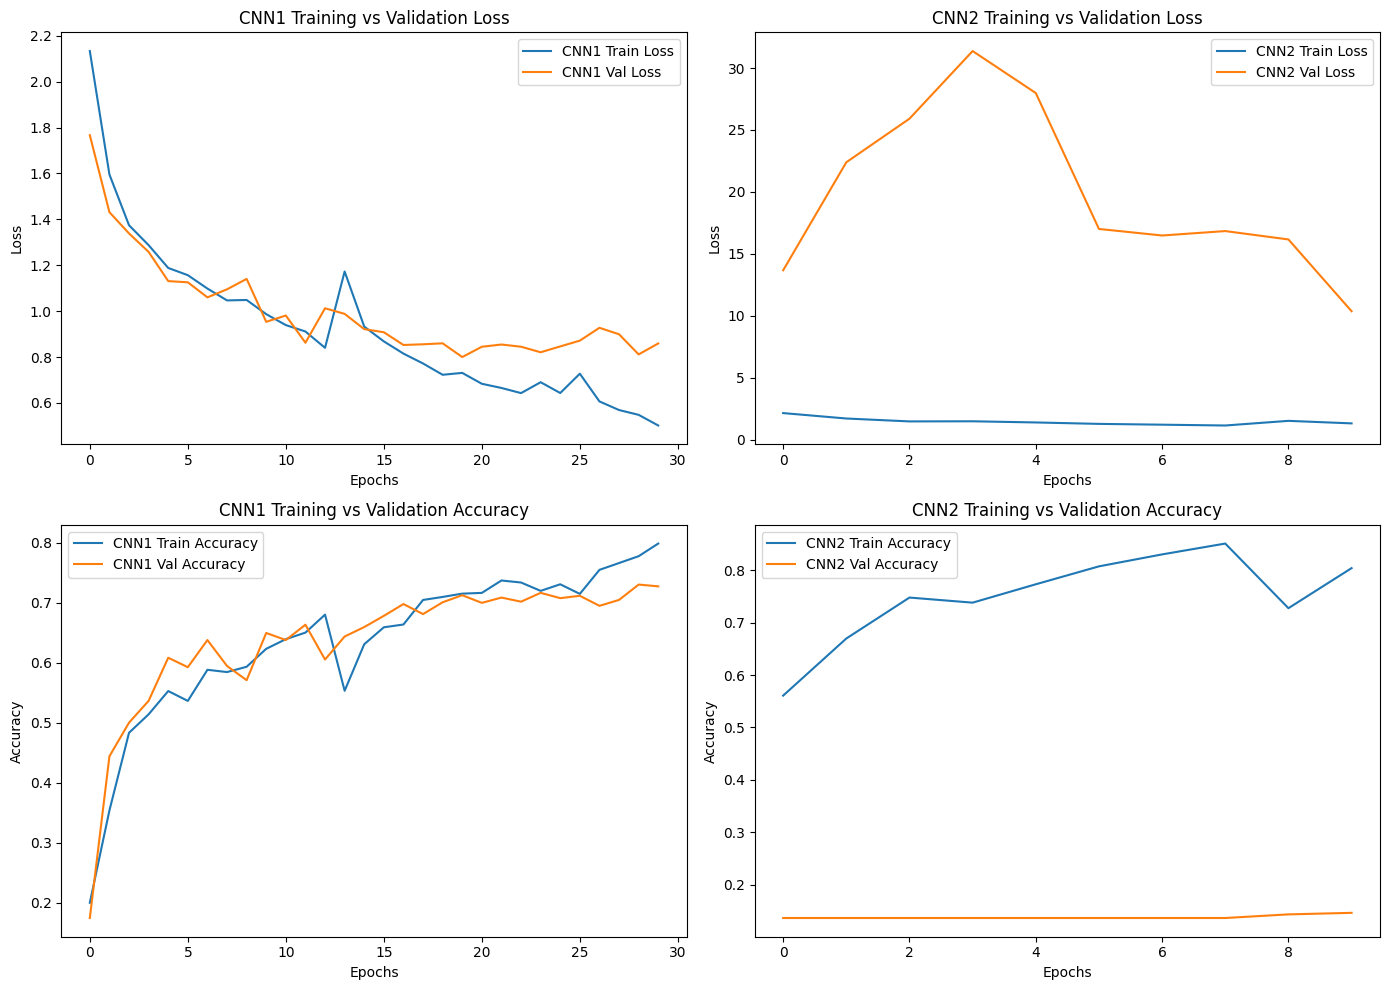

In [ ]:
import matplotlib.pyplot as plt

# Define a function to plot the training history
def plot_history(history_1, history_2):
    # Create subplots to compare the two models
    fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(14, 10))

    # CNN1 Training vs Validation Loss
    ax1[0].plot(history_1.history['loss'], label='CNN1 Train Loss')
    ax1[0].plot(history_1.history['val_loss'], label='CNN1 Val Loss')
    ax1[0].set_title('CNN1 Training vs Validation Loss')
    ax1[0].set_xlabel('Epochs')
    ax1[0].set_ylabel('Loss')
    ax1[0].legend()

    # CNN2 Training vs Validation Loss
    ax1[1].plot(history_2.history['loss'], label='CNN2 Train Loss')
    ax1[1].plot(history_2.history['val_loss'], label='CNN2 Val Loss')
    ax1[1].set_title('CNN2 Training vs Validation Loss')
    ax1[1].set_xlabel('Epochs')
    ax1[1].set_ylabel('Loss')
    ax1[1].legend()

    # CNN1 Training vs Validation Accuracy
    ax2[0].plot(history_1.history['accuracy'], label='CNN1 Train Accuracy')
    ax2[0].plot(history_1.history['val_accuracy'], label='CNN1 Val Accuracy')
    ax2[0].set_title('CNN1 Training vs Validation Accuracy')
    ax2[0].set_xlabel('Epochs')
    ax2[0].set_ylabel('Accuracy')
    ax2[0].legend()

    # CNN2 Training vs Validation Accuracy
    ax2[1].plot(history_2.history['accuracy'], label='CNN2 Train Accuracy')
    ax2[1].plot(history_2.history['val_accuracy'], label='CNN2 Val Accuracy')
    ax2[1].set_title('CNN2 Training vs Validation Accuracy')
    ax2[1].set_xlabel('Epochs')
    ax2[1].set_ylabel('Accuracy')
    ax2[1].legend()

    plt.tight_layout()
    plt.show()

# Assuming history_1 and history_2 are the training histories of CNN1 and CNN2
plot_history(history_1, history_2)


<a id = "cell_report"></a>
## 4. Experiments Report

*Provide a summary of experimental results, explain the meaning of your result
and how your model can be used to address the related business problem.*